# Assignment 3 : Computation of length scales and spectrum in space

We have fluctuations of velocity in time, but not in space. In order to get fluctuations of velocity in space (for a given time $t_0$) we should have an array of anemometers very close to each other (microns, probably), which is quite difficult (it is much more easier for CFD results).

Fortunately, there is the [Taylor hypothesis](https://www-sciencedirect-com.recursos.biblioteca.upc.edu/science/article/pii/B9780080443508500014#p15) (see also Pope's book reference at the beginning of the chapter, p. 223), which says that if turbulence can be considered (average) steady and fluctuations are much smaller than average velocity, time can be replaced by $x/\overline{u}$. The we can estimate the lenght scales of turbulence by replacing $t$ by $x$ and frequency $f$ by wavenumber $k$ (do not confuse with turbulent kinetic energy).

In this assignment it is proposed to to make all the previous analysis and find, in space:

- Kolmogorov's scale
- Autocorrelation function
- Integral scale
- Power spectrum (in $k$) and check the Kolmogorov's power law.

Do not do that for $y = 0 \,\text{mm}$. Choose another $y$ !

In [171]:
import pandas as pd
import numpy as np

columns = []


In [172]:
for i in range(17):
    y = (i-8)*5
    columns.append("y = "+str(y)+"mm")

In [173]:
turbulenceData = pd.read_csv('TurbVel.csv', delimiter=',', index_col=0, names=columns)
turbulenceData.index.name = "length"

In [174]:
# Calculate mean velocities for each y position
statData = turbulenceData.describe()
display (statData)
mean_velocities = statData.loc["mean"]


,y = -40mm,y = -35mm,y = -30mm,y = -25mm,y = -20mm,y = -15mm,y = -10mm,y = -5mm,y = 0mm,y = 5mm,y = 10mm,y = 15mm,y = 20mm,y = 25mm,y = 30mm,y = 35mm,y = 40mm
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.104367,21.044473,20.757320,20.316435,20.247308,20.270573,19.733937,19.493431,17.798975,17.059820,19.138614,19.377307,19.330135,19.228752,19.026175,19.121565,18.570242
std,0.187226,0.228523,0.762061,0.776583,0.536762,0.262442,0.251107,0.491538,1.124547,0.988907,0.305786,0.354726,0.462051,0.478166,0.694788,0.662401,0.860208
min,20.468907,20.207287,18.634798,18.866662,19.123603,19.704760,19.168608,18.297226,12.824605,13.765816,17.234927,17.764286,17.245155,17.265657,16.373577,16.511184,16.101291
25%,20.989390,20.989390,20.322845,19.751012,19.797365,20.065853,19.566596,19.075895,17.327294,16.491465,18.977981,19.213710,19.109572,18.989162,18.678760,18.722815,17.983749
50%,21.099841,21.112168,20.733695,20.225018,20.272393,20.219094,19.704760,19.532177,18.071674,17.173579,19.168608,19.440708,19.338256,19.258909,19.045057,19.258909,18.689782
75%,21.173826,21.186155,21.062977,20.624988,20.676252,20.492846,19.913683,19.937022,18.569031,17.774791,19.315560,19.601036,19.658606,19.520739,19.477807,19.601036,19.227838
max,21.647802,21.447038,23.727658,23.157105,21.774209,20.842895,20.361487,20.661140,19.843817,19.727874,20.077620,20.230943,20.721574,20.444995,20.830752,20.337691,20.492846


In [175]:
y_position = "y = 20mm"

In [176]:
# Create 'Lenght' column by multiplying 'Time' with corresponding mean velocity
turbulenceData.index = turbulenceData.index * mean_velocities.loc[y_position] #using y_position
turbulenceData.to_hdf("TurbVel.hdf", key='data', mode='w')

<Axes: xlabel='length', ylabel='u'>

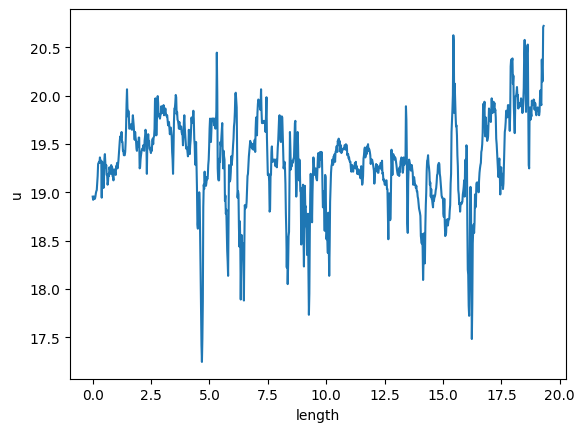

In [177]:
turbulenceData[y_position].plot(ylabel="u")  # Plot velocity for our y

In [178]:
display(turbulenceData)

,y = -40mm,y = -35mm,y = -30mm,y = -25mm,y = -20mm,y = -15mm,y = -10mm,y = -5mm,y = 0mm,y = 5mm,y = 10mm,y = 15mm,y = 20mm,y = 25mm,y = 30mm,y = 35mm,y = 40mm
length,,,,,,,,,,,,,,,,,
0.000000,20.916005,21.013892,19.890369,20.564816,19.247617,20.242762,20.171834,19.326923,17.711748,17.954515,19.112384,19.247617,18.955669,19.624038,18.989162,20.337691,17.901476
0.019330,20.757920,21.124463,19.878740,20.528820,19.258909,20.278330,20.124676,19.417902,16.314876,17.534186,19.213710,19.292888,18.922264,19.704760,18.833365,20.313920,17.743229
0.038660,20.661140,21.087559,20.101135,20.492846,19.213710,20.337691,20.136438,19.360977,13.902128,18.590930,19.202443,19.349631,18.933382,19.716296,18.601871,20.254624,17.922668
0.057990,20.794288,21.099841,20.207287,20.421109,19.315560,20.219094,20.124676,19.349631,12.840679,18.340470,19.281544,19.372364,18.955669,19.785785,18.503472,20.278330,17.471901
0.077321,20.952667,21.099841,20.349604,20.480892,19.292888,20.313920,20.148242,19.326923,15.086783,18.243283,19.247617,19.349631,18.944540,19.785785,17.838033,20.195451,18.135857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19.233484,21.087559,21.248015,19.349631,20.007225,19.785785,19.832212,19.612552,18.844470,17.010890,18.877784,17.234927,19.937022,20.373413,18.800155,17.451182,18.922264,19.808986
19.252814,21.013892,21.334855,19.474945,19.972095,19.774176,19.855463,19.601036,18.844470,16.960352,18.082340,17.513403,20.183621,20.148242,18.800155,17.440815,19.532177,20.207287
19.272144,21.050677,21.310005,19.440708,20.054129,19.704760,19.867080,19.578058,18.888878,16.373577,18.623839,17.680285,19.960385,20.148242,18.329634,17.461523,19.797365,20.160017


In [179]:
display(statData.loc["mean"])

,mean
y = -40mm,21.104367
y = -35mm,21.044473
y = -30mm,20.757320
y = -25mm,20.316435
y = -20mm,20.247308
y = -15mm,20.270573
y = -10mm,19.733937
y = -5mm,19.493431
y = 0mm,17.798975
y = 5mm,17.059820


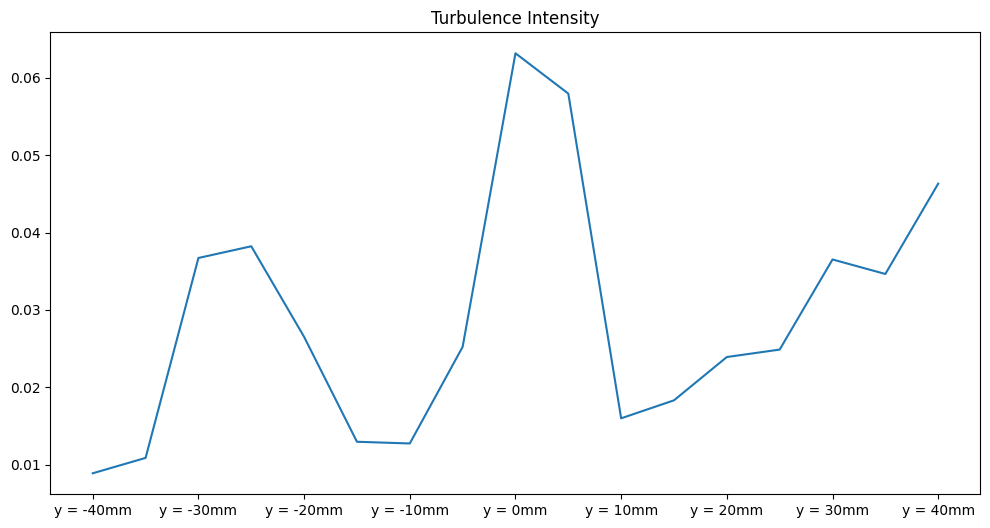

In [180]:
turbIntensity = statData.loc["std"]/statData.loc["mean"]
turbIntensity.plot(title="Turbulence Intensity",figsize=(12, 6))
turbVelFluct = turbulenceData-statData.loc["mean"]

<Axes: >

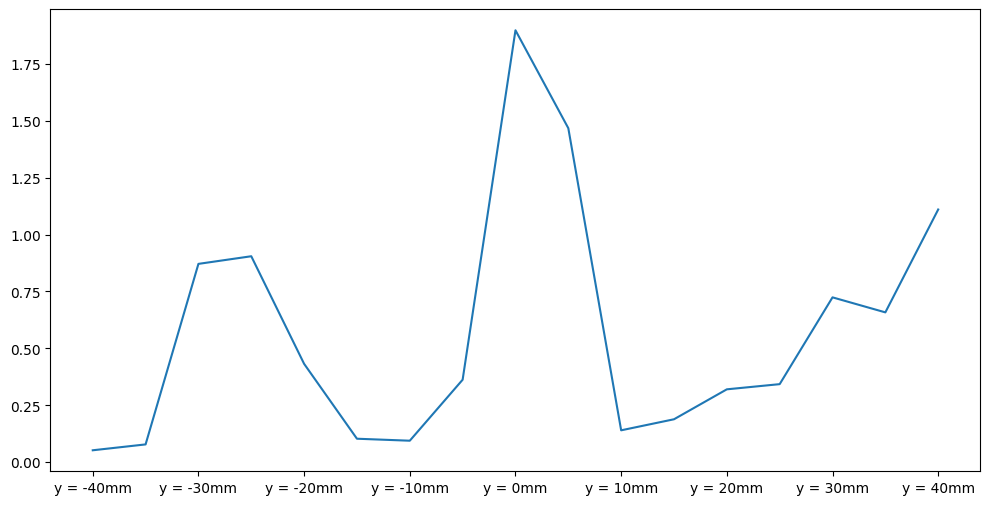

In [181]:
TKE_lenSca = 1.5*(statData.loc["std"])**2 # TKE in length scale: multiply mean acceleration (derivative of velocity) by mean velocity
TKE_lenSca.plot(figsize=(12, 6))

In [182]:
k = TKE_lenSca.loc[y_position] # plot TKE in length scale based on our position
display(k)

np.float64(0.3202368489873868)

In [183]:
nu = 1.5e-5 # m^2/s
c = 0.265 # m
Re_t = np.sqrt(k)*c/nu
print('Re_t = {:.5g}'.format(Re_t))

Re_t = 9997.5


In [184]:
epsilon = k**1.5/c # epsilon is dependent on k, so two epsilon needed
display(epsilon) # m^2/s^3

np.float64(0.68385036300751)

In [185]:
lengthScale = (nu**3/epsilon)**(1/4)
display("Length scale = " + str(lengthScale))

'Length scale = 0.00026505022293107894'

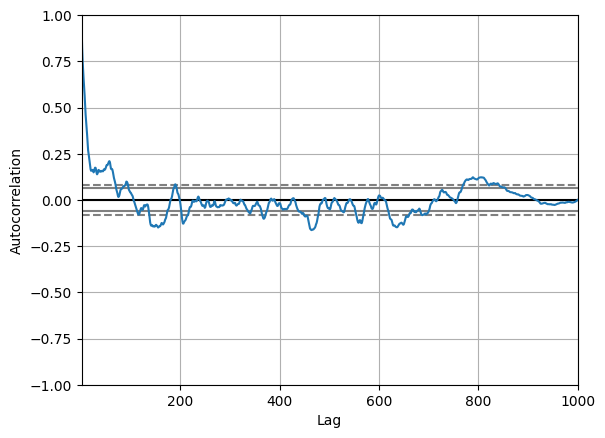

In [186]:
uPrime = turbVelFluct[y_position].values # plot autocorrelation of turbulance intensity for our y
autocorr = pd.plotting.autocorrelation_plot(uPrime).get_lines()[5].get_xydata()

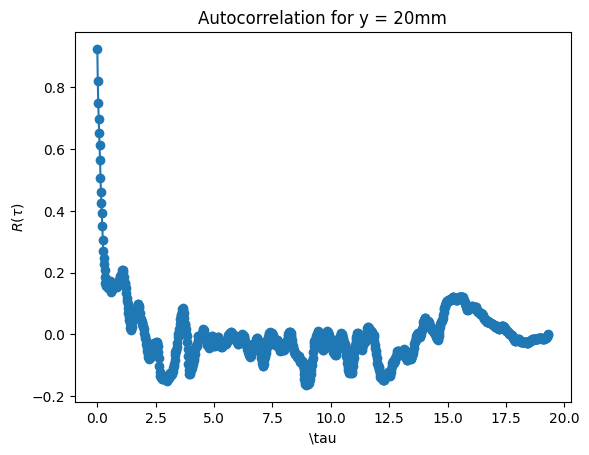

In [187]:
autocorr[:,0]=turbVelFluct.index.values
import matplotlib.pyplot as plt
plt.plot(autocorr[:,0],autocorr[:,1],'o-')
ax = plt.gca()
ax.set_ylabel(r"$R(\tau)$")
ax.set_xlabel(r"\tau")
ax.set_title("Autocorrelation for "+ y_position);

In [188]:
import statsmodels.api as sm
rho = sm.tsa.acf(uPrime,nlags=200,fft=False)
display(rho)

array([ 1.00000000e+00,  9.24941976e-01,  8.21852044e-01,  7.50620239e-01,
        6.96960392e-01,  6.51961788e-01,  6.12440357e-01,  5.65627138e-01,
        5.07940832e-01,  4.60861145e-01,  4.26052946e-01,  3.94007199e-01,
        3.51973594e-01,  3.06092964e-01,  2.68811528e-01,  2.46842905e-01,
        2.29205921e-01,  2.08224256e-01,  1.86332096e-01,  1.66313306e-01,
        1.57394727e-01,  1.58686781e-01,  1.61446988e-01,  1.62536481e-01,
        1.57314753e-01,  1.49125096e-01,  1.53649481e-01,  1.66836853e-01,
        1.74462129e-01,  1.73751592e-01,  1.64369329e-01,  1.46788751e-01,
        1.38577046e-01,  1.42631494e-01,  1.53154768e-01,  1.62344190e-01,
        1.60573743e-01,  1.54054806e-01,  1.52747604e-01,  1.57074768e-01,
        1.55001912e-01,  1.53733029e-01,  1.57494870e-01,  1.56602667e-01,
        1.54635686e-01,  1.59820902e-01,  1.65833272e-01,  1.64516485e-01,
        1.63766847e-01,  1.69688039e-01,  1.77302400e-01,  1.86856752e-01,
        1.89109737e-01,  

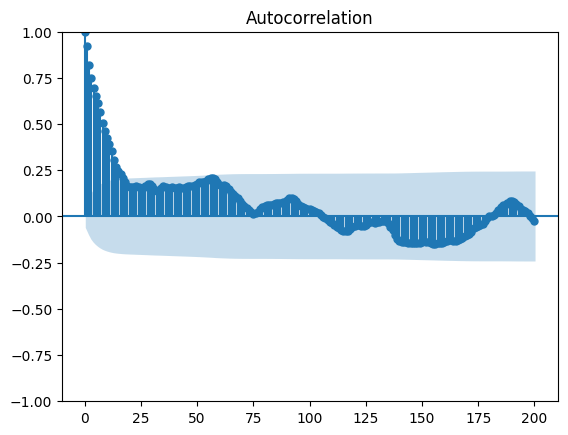

In [189]:
from scipy import integrate
fig = smg.tsa.plot_acf(uPrime, lags=200, fft=False)

In [190]:
T = integrate.trapezoid(rho[0:200],autocorr[0:200,0])
display ("Integration = " + str(T))

'Integration = 0.2662827185826806'

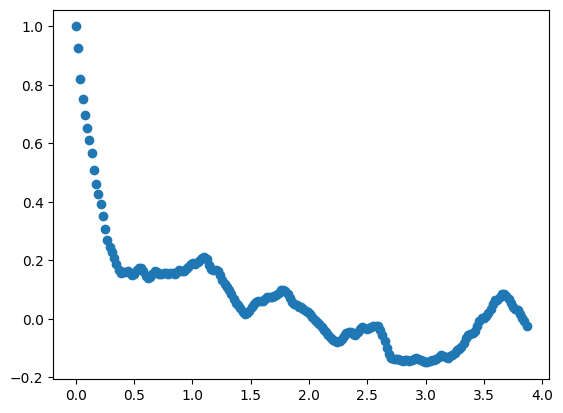

In [191]:
import matplotlib.pyplot as plt
xVal = turbVelFluct.index.values
plt.scatter(xVal[0:201],rho)

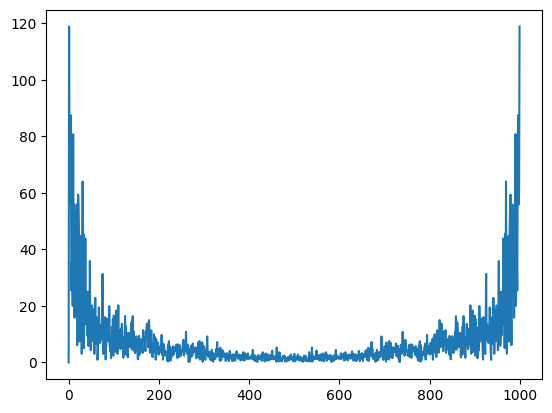

In [192]:
E = np.abs(np.fft.fft(uPrime))
plt.plot(E);

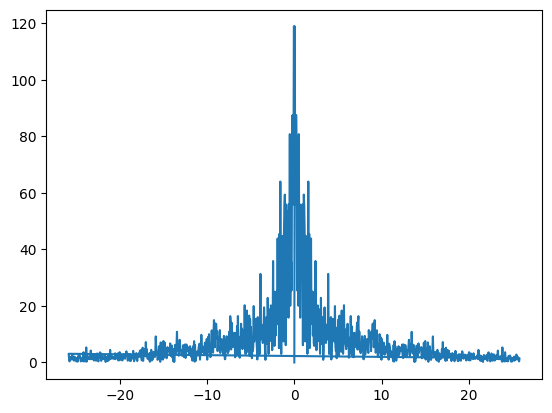

In [193]:
Wave = np.fft.fftfreq(uPrime.size,turbVelFluct.index.values[1])
plt.plot(Wave,E);

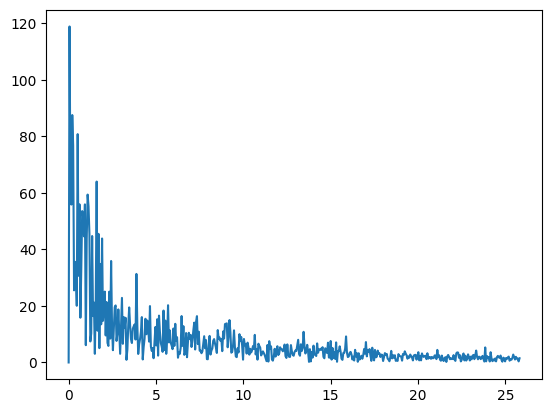

In [194]:
Wave = Wave[:len(E)//2]
E = E[:len(E)//2]

plt.plot(Wave,E);

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


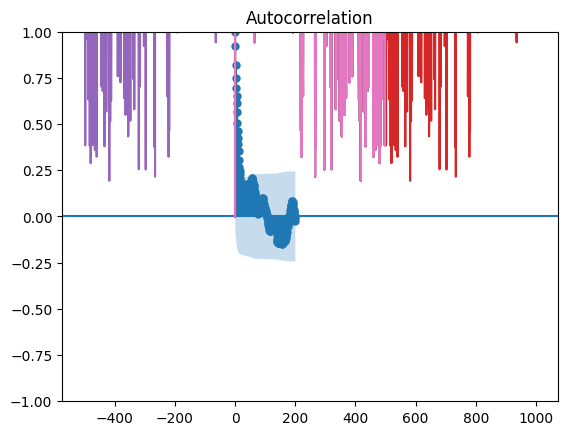

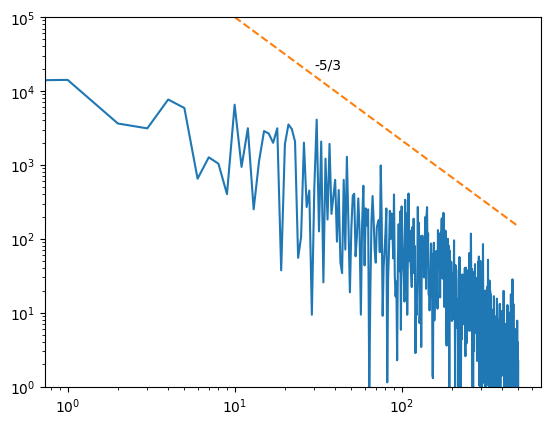

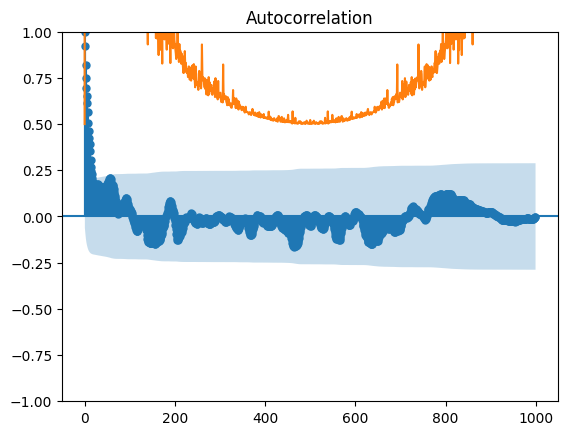

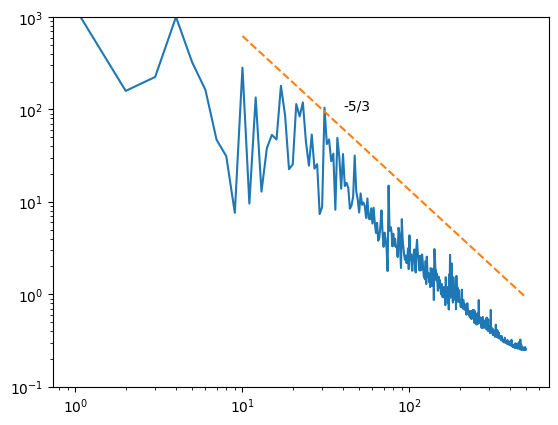

In [195]:

from scipy import integrate
T = integrate.trapezoid(autocorr[:,1],autocorr[:,0]) * statData.loc["mean"]
import statsmodels.api as sm
rho = sm.tsa.acf(uPrime,nlags=50,fft=False)
import statsmodels.graphics.api as smg
smg.tsa.plot_acf(uPrime,lags=200,fft=False)
T = integrate.trapezoid(rho[0:50],autocorr[0:50,0])
import scipy.stats as stats
X = stats.norm(0,statData[y_position].loc["std"]) # didn't put our y
X_samples= X.rvs(1000)
F, bins, patches = plt.hist(uPrime,bins=100,density=True) # Integral = 1
plt.hist(X_samples,bins=100,density=True);
deltaUPrime = np.diff(bins)
M0 = np.sum(F*deltaUPrime)
UPrimePDF = bins[:-1] + deltaUPrime/2
M1 = np.sum(UPrimePDF*F*deltaUPrime)
M2 = np.sum(UPrimePDF**2*F*deltaUPrime)
M3 = np.sum(UPrimePDF**3*F*deltaUPrime)
S = M3/M2**1.5
M4 = np.sum(UPrimePDF**4*F*deltaUPrime)
K = M4/M2**2
E = np.abs(np.fft.fft(uPrime))
plt.plot(E);
freq = np.fft.fftfreq(uPrime.size,0.001)
plt.plot(freq,E);
E = E[:len(E)//2]
freq = freq[:len(freq)//2]
plt.plot(freq,E);
P = E**2
plt.plot(freq,E)
fig, ax = plt.subplots(1)
ax.set_ylim(1,1e5)
ax.loglog(freq,P)
f_plot = np.logspace(1,2.7,100)
f_ref = 10 #Just a Frequancy and Energy of reference for the -5/3 law
P_ref = 1e5
P_plot = P_ref/f_ref**(-5/3)*f_plot**(-5/3)
ax.loglog(f_plot,P_plot,'--')
ax.text(30,20000,'-5/3');
rho = sm.tsa.acf(uPrime,nlags=999,fft=False)
smg.tsa.plot_acf(uPrime,lags=999,fft=False)
Pr = np.abs(np.fft.fft(rho))
plt.plot(Pr);
freq = np.fft.fftfreq(rho.size,0.001)
Pr = Pr[:int(len(Pr)/2)]**2
freq = freq[:int(len(freq)/2)]
fig, ax = plt.subplots(1)
ax.set_ylim(0.1,1000)
ax.loglog(freq,Pr)
f_plot = np.logspace(1,2.7,100)
f_ref = 30
P_ref = 100
P_plot = P_ref/f_ref**(-5/3)*f_plot**(-5/3)
ax.loglog(f_plot,P_plot,'--')
ax.text(40,100,'-5/3');
try:
    %load_ext watermark
except:
    !pip install watermark
